# <center> DENİZ BALCI SİMÜLASYON 4.ÖDEVİ</center>

# 1)  Paket Kurulumu ve Ön açıklama

Bütün hücreleri ayrı ayrı veya bütün halde çalıştırabilirsiniz.İlk olarak paketleri yükleyelim.

In [ ]:
!pip install scipy
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Soru1 


Box-müller yöntemi (dönüşümü =nedir  anlatınız.

Box müller methodu ,standart normal dağılımdan veri üretilmek için oluşturulan bir yöntemdir.
Kısacası yapılan işlem şu :değişken değiştirme yöntemi kullanılarak kartezyen koordinat sisteminden polar koordinat 
sistemine geçerek .Standart normal dağılım kullanılarak veri üretilir.


## Soru 2
a) $X \sim N(\mu,\sigma^2)$ Normal dağılımına sahip olsun.Box müller yöntemi ile X rassal değişkeninden 100 birim veri üretiniz

b) Kabul red yönteminde  $v=g(v) \sim cauchy $ olacak şekilde X rassal değişkeninden veri üretiniz

c) K-R  yönteminde  $g(v)$ 'yi siz belirleyiniz.

### A şıkkı 1.YOL

/tmp/ipykernel_16254/2156216345.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[i] = mu + X * sigma


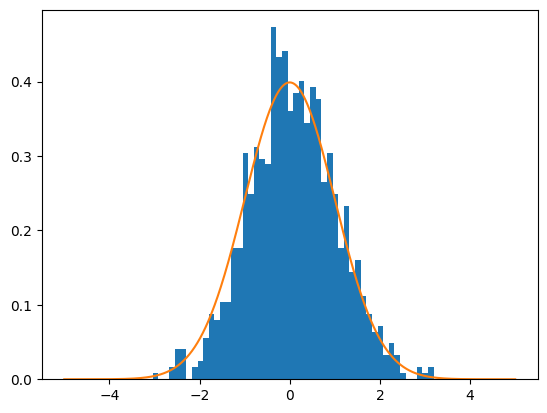

In [62]:
import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def f(theta, E):
    return np.cos(theta)* np.sqrt(2 * E)

def BoxMuller(N, mu=0, sigma=1):
    out = np.zeros(N)
    for i in range(N):
        theta = rd.uniform(low=0, high=2 * np.pi, size=1)
        E = rd.exponential(scale=1 / 1, size=1)
        X = f(theta, E)
        out[i] = mu + X * sigma
    return out

def phi(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))

plt.figure()
X = BoxMuller(1000, mu=0, sigma=1)
plt.hist(X, bins=50, density=True)
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, phi(xx, 0, 1))
plt.show()


### A şıkkı 2.yol

In [63]:
U1= rd.uniform(low=0, high=1 , size=500)
U2= rd.uniform(low=0, high=1 , size=500)
X1=np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
X2=np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
X=np.concatenate((X1,X2),axis=0)
X

array([-8.76860123e-01, -1.37039266e+00,  2.33183634e-01,  3.07076693e-01,
        7.95846304e-02,  9.12551914e-01,  6.49602133e-02,  1.77041809e+00,
        1.09754226e+00,  1.38590104e-01, -2.27782421e-01,  3.15821367e-01,
        1.64009527e+00,  5.60531548e-01,  2.40314928e-01, -2.64636691e-01,
       -7.46189667e-01,  1.86539917e+00, -4.10546681e-01,  1.37085770e+00,
       -2.01122148e+00,  4.46186230e-01, -1.14806157e-01,  1.99155426e+00,
        7.21540497e-02, -6.09314655e-01,  2.09579059e-01,  1.16743344e+00,
       -9.40572583e-01, -5.83846214e-02,  2.68853896e-01, -1.66452739e+00,
        3.13698619e-01, -1.08537192e+00, -6.16665071e-01,  9.15787056e-01,
       -1.79541498e+00,  1.20731231e+00, -1.34153971e+00,  2.12134513e+00,
        9.94995367e-01,  1.84272230e+00,  5.67590211e-01, -4.69072491e-01,
        2.16688565e+00,  1.22603935e+00, -8.95753913e-01, -7.48390897e-01,
       -8.73859960e-01,  2.14465738e-01,  1.11256247e+00,  1.06861311e+00,
        1.03145890e+00,  

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  4.,  1.,  1.,  2.,
         6.,  3.,  4.,  4.,  6.,  7., 11., 15.,  6., 16., 10., 15.,  9.,
        19., 14., 20., 15., 13., 20., 25., 17., 24., 23., 25., 45., 38.,
        27., 29., 24., 29., 31., 28., 34., 32., 27., 26., 31., 19., 19.,
        19., 22., 26., 16., 12., 19., 16., 16.,  9., 10.,  4.,  8.,  4.,
         4.,  6.,  5.,  2.,  3.,  7.,  0.,  2.,  1.,  4.,  0.,  2.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-3.93576452e+00, -3.86287981e+00, -3.78999511e+00, -3.71711040e+00,
        -3.64422569e+00, -3.57134098e+00, -3.49845627e+00, -3.42557157e+00,
        -3.35268686e+00, -3.27980215e+00, -3.20691744e+00, -3.13403273e+00,
        -3.06114803e+00, -2.98826332e+00, -2.91537861e+00, -2.84249390e+00,
        -2.76960919e+00, -2.69672449e+00, -2.62383978e+00, -2.55095507e+00,
        -2.47807036e+00, -2.40518566e+00, -2.33230095e

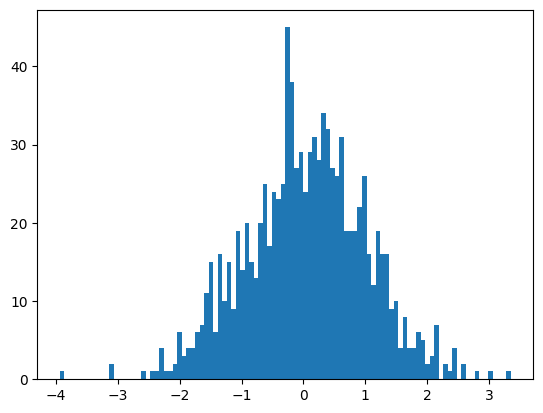

In [64]:
plt.clf()
plt.hist(X,bins=100)

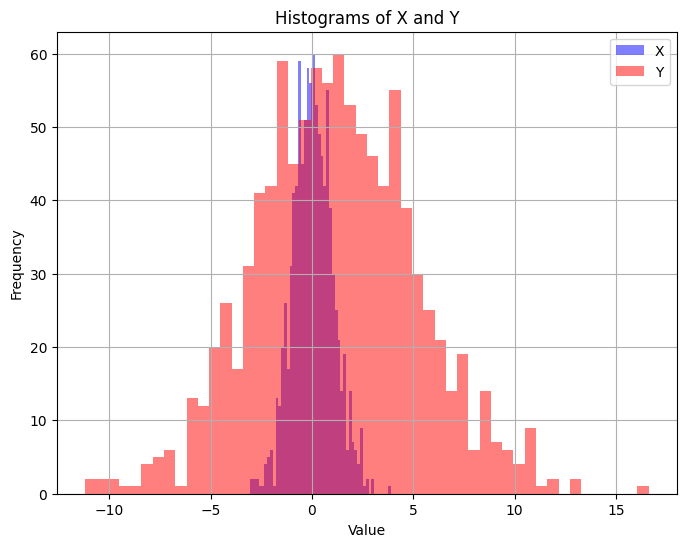

In [65]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 1
sigma = 4
N = 1000  # Number of samples

# Generate random samples for X
X = np.random.randn(N)

# Calculate Y
Y = mu + X * sigma

# Plot histograms
plt.figure(figsize=(8, 6))

# Histogram for X
plt.hist(X, bins=50, color='blue', alpha=0.5, label='X')

# Histogram for Y
plt.hist(Y, bins=50, color='red', alpha=0.5, label='Y')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of X and Y')
plt.legend()

# Show plot
plt.grid(True)
plt.show()



### kaynakça

https://www.youtube.com/watch?v=SvneCLZ3dLk  a şıkkı 1.yol

https://www.youtube.com/watch?v=4fVQrH65aWU  a şıkkı 2.yol

https://www.colorado.edu/amath/sites/default/files/attached-files/stochastic_simulation6.pdf

https://rh8liuqy.github.io/Box_Muller_Algorithm.html

### B ŞIKKI  

Kabul red yönteminde  $v=g(v) \sim cauchy $ olacak şekilde X rassal değişkeninden veri üretiniz

In [94]:
import numpy as np
import math

def cauchy_fx(x, theta):
    return (1/np.pi)*(1/(1-(x-theta)**2))

def cauchy_Fx(x, theta):
    return (1/np.pi)*np.arctan(x-theta)+1/2

def inverse_cauchyFx(x, theta):
    return np.tan(np.pi*(x-0.5))+theta

def generate_cauchy(n, theta):
    dataset = np.random.uniform(0, 1, n)
    generated_values = []
    for i in dataset:
        pvalue = inverse_cauchyFx(i, theta)
        generated_values.append(pvalue)
    return generated_values

def normal_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def find_c(N, mu, sigma, theta):
    dataset = np.random.uniform(0, 1, N)
    generated_values = []
    for i in dataset:
        value = normal_pdf(i, mu, sigma) / cauchy_fx(i, theta) 
        generated_values.append(value)
    return np.max(generated_values)


kabul_dataset = []
n = 100
theta = 1
mu = 0
sigma = 1
for i in range(0, n):
    v = generate_cauchy(1, theta)[0]  
    u = np.random.uniform(0, 1, 1)
    gv = cauchy_fx(v, theta)
    fv = normal_pdf(v, mu, sigma)
    c = find_c(n, mu, sigma, theta)  
    value = fv / (c * gv)
    if u < value:
        kabul_dataset.append(value)

print(len(kabul_dataset) / n)


0.33


In [4]:
import numpy as np
import math

def gumbel_fx(x, mu, beta):
    return (1/beta) * np.exp(-(x - mu) / beta) * np.exp(-np.exp(-(x - mu) / beta))

def gumbel_Fx(x, mu, beta):
    return np.exp(-np.exp(-(x - mu) / beta))

def inverse_gumbelFx(x, mu, beta):
    return mu - beta * np.log(-np.log(x))

def generate_gumbel(n, mu, beta):
    dataset = np.random.uniform(0, 1, n)
    generated_values = []
    for i in dataset:
        pvalue = inverse_gumbelFx(i, mu, beta)
        generated_values.append(pvalue)
    return generated_values

def normal_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def find_c(N, mu, sigma, theta):
    dataset = np.random.uniform(0, 1, N)
    generated_values = []
    for i in dataset:
        value = normal_pdf(i, mu, sigma) / gumbel_fx(i, mu, beta) 
        generated_values.append(value)
    return np.max(generated_values)


kabul_dataset = []
n = 100
mu = 0
beta = 1
sigma = 1
for i in range(0, n):
    v = generate_gumbel(1, mu, beta)[0]  # Access the first element of the generated list
    u = np.random.uniform(0, 1, 1)
    gv = gumbel_fx(v, mu, beta)
    fv = normal_pdf(v, mu, sigma)
    c = find_c(n, mu, sigma, beta)  # Corrected N
    value = fv / (c * gv)
    if u < value:
        kabul_dataset.append(value)

print(len(kabul_dataset) / n)


0.9


https://en.wikipedia.org/wiki/Gumbel_distribution